In [10]:
import os
import pandas as pnd
import numpy as nupy
import seaborn as sns
import matplotlib.pyplot as plot

In [11]:
url1 = 'https://raw.githubusercontent.com/Shourya0712/titanicDT/main/titanic_train.csv'
url2 = 'https://raw.githubusercontent.com/Shourya0712/titanicDT/main/test.csv'
train_set = pnd.read_csv(url1)
test_set = pnd.read_csv(url2)

In [12]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].mean())

In [18]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
train_set['Embarked'] = train_set['Embarked'].fillna(train_set['Embarked'].mode()[0])

In [20]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
embarked_mode = train_set['Embarked'].mode()[0]
print(embarked_mode)

S


In [22]:
train_set['Embarked'] = train_set['Embarked'].fillna(embarked_mode)


In [23]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
train_set['Cabin_Letter'] = train_set['Cabin'].apply(lambda x: str(x)[0])

In [25]:
train_set['Cabin_Letter'].value_counts()

Cabin_Letter
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [26]:
X = train_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Letter', 'Embarked']]
y = train_set['Survived']

In [27]:
from sklearn.preprocessing import LabelEncoder          
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [28]:
le = LabelEncoder()
train_set['Sex'] = le.fit_transform(train_set['Sex'])

In [29]:
X = train_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Letter', 'Embarked']]
y = train_set['Survived']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [31]:
train_set['Embarked'] = le.fit_transform(train_set['Embarked'])

In [32]:
train_set['Cabin_Letter'] = le.fit_transform(train_set['Cabin_Letter'])

In [33]:
train_set.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,8
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,1,8
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,2,4
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,2,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,2,8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,0,8


In [34]:
train_set.corr(numeric_only=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128,-0.030939
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675,-0.301116
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098,0.746616
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262,0.123076
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749,-0.249134
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230,0.041540
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798,-0.032548
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719,-0.523013
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000,0.194255
Cabin_Letter,-0.030939,-0.301116,0.746616,0.123076,-0.249134,0.041540,-0.032548,-0.523013,0.194255,1.000000


In [35]:
X = train_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Letter', 'Embarked']]
# X = train_set[['Pclass', 'Sex', 'Age',  'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_set['Survived']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=65)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Test Accuracy: 0.8222222222222222
Train Accuracy: 0.846441947565543


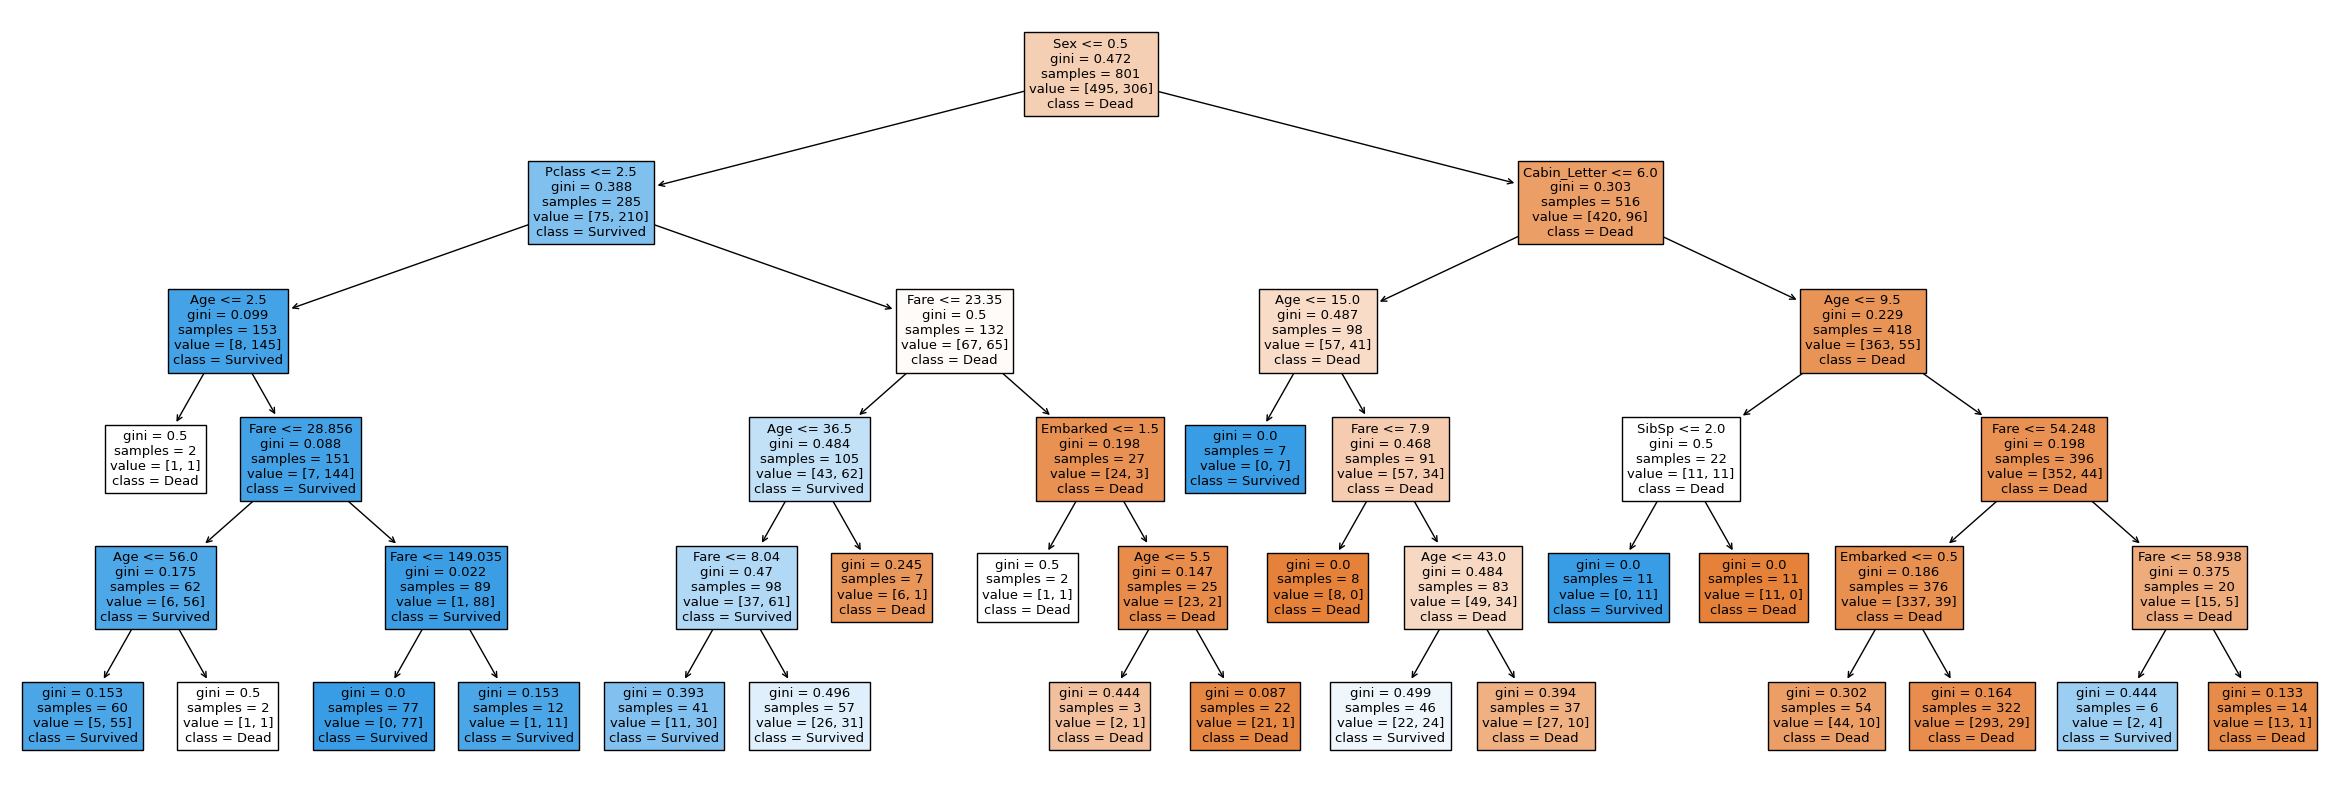

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=8)
gs.fit(x_train, y_train)

best_clf = gs.best_estimator_
y_pred = best_clf.predict(x_test)
yt_pred = best_clf.predict(x_train)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, yt_pred)

# Print the best parameters found
print("Best Parameters:", gs.best_params_)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

#plot tree
plot.figure(figsize=(30, 10))
tree.plot_tree(best_clf, feature_names=list(X.columns), class_names=['Dead', 'Survived'], filled=True)
plot.show()

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=65, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print(gs.cv_results_)  

0.83270911360799
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
{'mean_fit_time': array([0.34907699, 0.47951063, 2.31736398, 3.98057111, 6.09895651,
       0.36027638, 0.52474229, 2.27914437, 4.25119646, 4.66219838,
       0.21627617, 0.74940578, 2.28568403, 3.95806193, 5.10880907,
       0.34962797, 0.6259199 , 2.32556979, 3.81450311, 5.21995211,
       0.24948502, 0.472001  , 2.41081119, 3.69699502, 5.40499751,
       0.27779945, 0.54392282, 2.37712789, 4.43397546, 5.43011244,
       0.29737163, 0.6869212 , 2.19706726, 4.30621847, 5.26877371,
       0.31758889, 0.69795338, 2.27575501, 4.13023901, 5.31245263,
       0.31889478, 0.57440702, 2.45663484, 4.21012338, 5.39353808,
       0.2785267 , 0.48835429, 2.52662849, 4.1319441 , 5.78748178,
       0.41892974, 0.61710167, 2.29580863, 4.37137198, 5.01174005,
       0.27848403, 0.57237601, 1.91613801, 3.80944037, 5.09366051,
       0.27876981, 0.51791573, 2.13594246, 3.92401052, 5.43244489,


In [39]:
gs = gs.fit(x_test, y_test)
print(gs.best_score_)

0.8222222222222223


# Predicting on test data

In [52]:
test_set['Age'] = test_set['Age'].fillna(test_set['Age'].mean())
test_set['Fare'] = test_set['Fare'].fillna(test_set['Fare'].mean())
test_set['Embarked'] = test_set['Embarked'].fillna(test_set['Embarked'].mode()[0])
test_set['Embarked'] = le.fit_transform(test_set['Embarked'])
test_set['Cabin_Letter'] = test_set['Cabin'].apply(lambda x: str(x)[0])
test_set['Cabin_Letter'] = le.fit_transform(test_set['Cabin_Letter'])
test_set['Sex'] = le.fit_transform(test_set['Sex'])

In [53]:
test_set.head(25)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,NaN,1,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,NaN,2,7
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,NaN,1,7
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,NaN,2,7
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,NaN,2,7
5,897,3,"Svensson, Mr. Johan Cervin",1,14.00000,0,0,7538,9.2250,NaN,2,7
6,898,3,"Connolly, Miss. Kate",0,30.00000,0,0,330972,7.6292,NaN,1,7
7,899,2,"Caldwell, Mr. Albert Francis",1,26.00000,1,1,248738,29.0000,NaN,2,7
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.00000,0,0,2657,7.2292,NaN,0,7
9,901,3,"Davies, Mr. John Samuel",1,21.00000,2,0,A/4 48871,24.1500,NaN,2,7


In [54]:
test_set.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           327
Embarked          0
Cabin_Letter      0
dtype: int64

In [58]:
test_X = test_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Cabin_Letter', 'Embarked']]
# Make predictions on the test data using the trained Decision Tree classifier
test_predictions_dt = best_clf.predict(test_X)
# Make predictions on the test data using the trained Random Forest classifier
test_predictions_rf = gs.predict(test_X)
# Output predictions
output_dt = pnd.DataFrame({'PassengerId': test_set.PassengerId, 'Survived':test_predictions_dt})
output_rf = pnd.DataFrame({'PassengerId': test_set.PassengerId, 'Survived':test_predictions_rf})
# Save the predictions to a CSV file
output_dt.to_csv('predictions_decision_tree.csv', index=False)
output_rf.to_csv('predictions_random_forest.csv', index=False)

In [60]:
compareDtAndRf = accuracy_score(test_predictions_dt, test_predictions_rf)
print("Comparing results predicted by Decision Tree and Random Forest", compareDtAndRf)

Comparing results predicted by Decision Tree and Random Forest 0.8444976076555024


moreover ipynb file and predicted data set ca be found on following github repo:
https://github.com/Shourya0712/titanicDT